<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

Build Credit Card Fraud Detection model on dataset 


In [0]:
#Import neccesary libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Access the creditcard dataset

In [5]:
from google.colab import files
uploaded=files.upload()

Saving creditcard.csv to creditcard.csv


# Read the file

In [0]:
#Data access - Reading from a file
df = pd.read_csv("creditcard.csv")

# Explore the Data

In [7]:
df.head()
df.info()
df.shape
df.columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

(284807, 31)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The datasets contains transactions made by credit cards where we have 492 frauds out of 284,807 transactions.It contains only numerical input variables.Features V1, V2, ... V28 are the principal components obtained with PCA.The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [8]:
#check for missing values
pd.isnull(df).any()
pd.isnull(df).sum()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

0    284315
1       492
Name: Class, dtype: int64


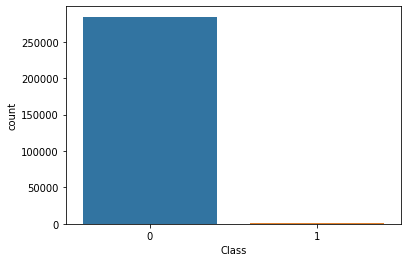

In [9]:
#understand the class distribution
print(df['Class'].value_counts())
sns.countplot(x="Class", data=df) 

In [10]:
#Create features and labels using Pandas  ‘.drop() ‘
x=df.drop('Class',axis=1)
y=df['Class']
x.head()
y.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [11]:
#Split the data into the training and test datasets
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_x.shape
train_y.shape
test_x.shape 
test_y.shape    

(199364, 30)

(199364,)

(85443, 30)

(85443,)

In [0]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score


In [0]:
#Building a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()

In [14]:
#Fit the model instant on the training data using
log.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Predict for test data and Generate model Diagnostics
classes = log.predict(test_x)
print(classes.size)
print('Positive cases ',test_y[test_y == 1].shape[0])
print('Negative cases ',test_y[test_y == 0].shape[0])

85443
Positive cases  135
Negative cases  85308


In [16]:
print(metrics.classification_report(test_y,classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.73      0.59      0.65       135

    accuracy                           1.00     85443
   macro avg       0.86      0.80      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt.fit(train_x,train_y)
classes = dt.predict(test_x)
class_names = 'Default'
auc = metrics.roc_auc_score(test_y,classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.8517873795866481

In [19]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes ))
print("Precision\Recall metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
print(metrics.roc_auc_score(test_y,classes))

Accuracy Score
0.999403110845827
Precision\Recall metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.90      0.70      0.79       135

    accuracy                           1.00     85443
   macro avg       0.95      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC
0.8517873795866481


#Random Forest Classifier

In [0]:
rfc = RandomForestClassifier()


In [0]:
def train_model(model):
    # Checking accuracy
    model = model.fit(train_x,train_y)
    pred = model.predict(test_x)
    print('accuracy_score',accuracy_score(test_y, pred))
    print('precision_score',precision_score(test_y, pred))
    print('recall_score',recall_score(test_y, pred))
    print('f1_score',f1_score(test_y, pred))
    return model

In [31]:
rfc = train_model(rfc)

accuracy_score 0.9995084442259752
precision_score 0.9345794392523364
recall_score 0.7407407407407407
f1_score 0.8264462809917356


In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
x_rus, y_rus, id_rus = rus.fit_sample(x,y)

In [0]:
train_x, test_x,train_y,test_y = train_test_split(x_rus, y_rus, test_size=0.3)

In [42]:
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(688, 30) (688,)
(296, 30) (296,)


In [43]:
rfc = RandomForestClassifier()
rfc = train_model(rfc)

accuracy_score 0.9425675675675675
precision_score 0.9652777777777778
recall_score 0.9205298013245033
f1_score 0.9423728813559322


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Over Sampling Using SMOTE Tomek

In [0]:
#from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt, y_smt = smt.fit_sample(x, y)

In [45]:
train_x,test_x,train_y, test_y = train_test_split(x_smt, y_smt, test_size = 0.30, random_state =1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(397250, 30)

(397250,)

(170250, 30)

(170250,)

In [46]:
#Check the sample size for both the classes after SMOTE algorithm
classes = log.predict(test_x)
print(classes.size)
print('Positive cases ',test_y[test_y == 1].shape[0])
print('Negative cases ',test_y[test_y == 0].shape[0])

170250
Positive cases  85019
Negative cases  85231


In [47]:
#Fit the model instant on the training data using
log.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print(metrics.classification_report(test_y,classes))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85231
           1       1.00      0.66      0.79     85019

    accuracy                           0.83    170250
   macro avg       0.87      0.83      0.82    170250
weighted avg       0.87      0.83      0.82    170250



# Decision Tree Classifier

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [50]:
clf = train_model(clf)

accuracy_score 0.9981556534508076
precision_score 0.9976148793927929
recall_score 0.9986944094849387
f1_score 0.9981543525539294


#Random Forest Classification

In [51]:
rfc = RandomForestClassifier()
rfc = train_model(rfc)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.9998883994126285
precision_score 0.9998353483558358
recall_score 0.9999411896164386
f1_score 0.9998882661852311


# Random Sampling Using Cluster Centroids

In [0]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
x_cc, y_cc = cc.fit_sample(x, y)

# Train and Test The Data

In [55]:
train_x,test_x,train_y, test_y = train_test_split(x_cc, y_cc, test_size = 0.30, random_state =1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(351, 30)

(351,)

(151, 30)

(151,)

# Random Forest Classifier

In [63]:
rfc = RandomForestClassifier()
rfc = train_model(rfc)

accuracy_score 0.9933774834437086
precision_score 0.9932885906040269
recall_score 1.0
f1_score 0.9966329966329966


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Given the class imbalance ratio, Confusion matrix accuracy is not meaningful.For unbalanced classification we need to measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC).